# Kernel SVM

In [4]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [5]:
import numpy as np
from matplotlib import pyplot as plt
#200개의 데이터, feature = 2개
np.random.seed(30)
X = np.random.randn(200, 2)
y = np.logical_xor(X[:, 0]>0, X[:, 1]>0)
y = np.where(y, 1, -1)
plt.scatter(X[y==1, 0], X[y==1, 1], c='b')
plt.scatter(X[y==-1, 0], X[y==-1, 1], c='r')
plt.show()

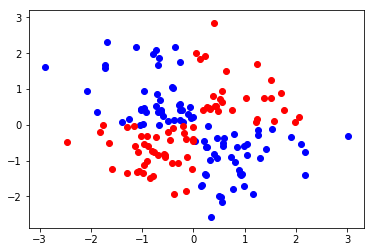

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   shuffle=True)
plt.scatter(X_train[y_train==1, 0],
            X_train[y_train==1, 1], c='b')
plt.scatter(X_train[y_train==-1, 0],
            X_train[y_train==-1, 1], c='r')
plt.show()

In [7]:
model_linear = SVC(kernel='linear', C=0.1).fit(X_train, y_train)
model_linear.score(X_test, y_test)

0.55

contourf : 선 그리기  
meshgrid : 격자 점 만들기

#### boundary 그리기

In [8]:
x_min, x_max, y_min, y_max = -3, 3, -3, 3
X_grid, Y_grid = np.meshgrid(np.arange(x_min, x_max, 0.001),
                            np.arange(y_min, y_max, 0.001))
print(X_grid.shape, X_grid)

(6000, 6000) [[-3.    -2.999 -2.998 ...  2.997  2.998  2.999]
 [-3.    -2.999 -2.998 ...  2.997  2.998  2.999]
 [-3.    -2.999 -2.998 ...  2.997  2.998  2.999]
 ...
 [-3.    -2.999 -2.998 ...  2.997  2.998  2.999]
 [-3.    -2.999 -2.998 ...  2.997  2.998  2.999]
 [-3.    -2.999 -2.998 ...  2.997  2.998  2.999]]


In [9]:
#flatten : ravel()
x = np.array([[1, 2, 3], [4, 5, 6]])
print(x.ravel())

print(X_grid.ravel().shape, X_grid.ravel())

[1 2 3 4 5 6]
(36000000,) [-3.    -2.999 -2.998 ...  2.997  2.998  2.999]


In [10]:
x, y = [1, 2, 3], [10, 20, 30]
print(np.array([x, y]).T)

np.array([X_grid.ravel(), Y_grid.ravel()]).T

[[ 1 10]
 [ 2 20]
 [ 3 30]]


array([[-3.   , -3.   ],
       [-2.999, -3.   ],
       [-2.998, -3.   ],
       ...,
       [ 2.997,  2.999],
       [ 2.998,  2.999],
       [ 2.999,  2.999]])

In [11]:
def draw_contour(model, X, y):
    x_min, x_max, y_min, y_max = -3, 3, -3, 3
    X_grid, Y_grid = np.meshgrid(np.arange(x_min, x_max, 0.001),
                                np.arange(y_min, y_max, 0.001))

    pred_grid = model.predict(np.array([X_grid.ravel(), Y_grid.ravel()]).T)
    Z = np.reshape(pred_grid, X_grid.shape)

    plt.contourf(X_grid, Y_grid, Z, alpha=0.3)
    plt.scatter(X[y==1, 0],
                X[y==1, 1], c='b')
    plt.scatter(X[y==-1, 0],
                X[y==-1, 1], c='r')
    plt.show()

In [12]:
degree = [d for d in range(10)]

acc_tr, acc_ts = [], []

for d in degree:
    model_poly = SVC(kernel='poly', degree=d, gamma=1, coef0=1).fit(X_train, 
                                                                    y_train)

    print('degree: {}, trainset: {}, testset: {}'.format(d,
                        model_poly.score(X_train, y_train),
                          model_poly.score(X_test, y_test)))
    acc_tr.append(model_poly.score(X_train, y_train))
    acc_ts.append(model_poly.score(X_test, y_test))

degree: 0, trainset: 0.55, testset: 0.55
degree: 1, trainset: 0.55, testset: 0.55
degree: 2, trainset: 0.9625, testset: 0.925
degree: 3, trainset: 0.95625, testset: 0.875
degree: 4, trainset: 0.975, testset: 0.925
degree: 5, trainset: 0.98125, testset: 0.925
degree: 6, trainset: 0.98125, testset: 0.9
degree: 7, trainset: 0.9875, testset: 0.9
degree: 8, trainset: 0.9875, testset: 0.9
degree: 9, trainset: 0.9875, testset: 0.9


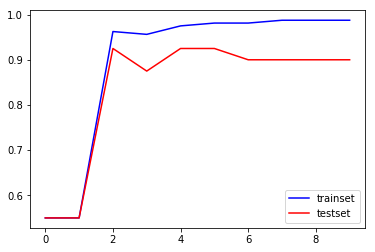

In [18]:
plt.plot(degree, acc_tr, c='b', label='trainset')
plt.plot(degree, acc_ts, c='r', label='testset')
plt.legend(loc=4)
plt.show()

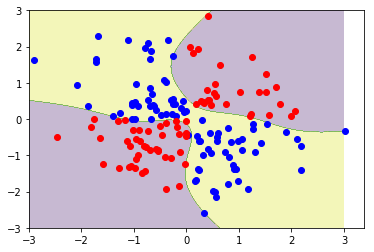

In [28]:
draw_contour(model_poly, X_train, y_train)

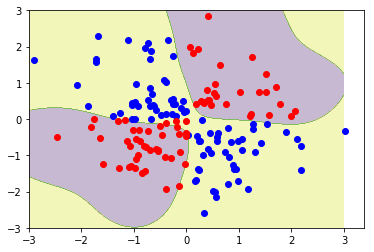

In [29]:
#가우시안 커널 
model_rbf = SVC(kernel='rbf', gamma=1).fit(X_train, y_train)
draw_contour(model_rbf, X_train, y_train)

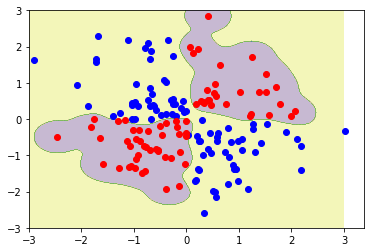

In [30]:
model_rbf = SVC(kernel='rbf', gamma=1e1).fit(X_train, y_train)
draw_contour(model_rbf, X_train, y_train)

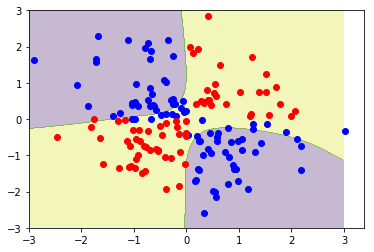

In [33]:
model_rbf = SVC(kernel='sigmoid', gamma=1, coef0=1).fit(X_train, y_train)
draw_contour(model_rbf, X_train, y_train)

In [32]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline 

In [52]:
X_train.shape

(160, 2)

In [55]:
def basis(X):
    basis_function = [X[:, 0]**2, X[:, 0]*X[:, 1], X[:, 1]**2]
    basis = np.array(basis_function).T
    return basis

In [56]:
basis(X_train).shape

(160, 3)

In [69]:
x = np.arange(6).reshape(3, 2)
x

array([[0, 1],
       [2, 3],
       [4, 5]])

In [70]:
basis(x)

array([[ 0,  0,  1],
       [ 4,  6,  9],
       [16, 20, 25]])

In [71]:
X_train.shape

(160, 2)

In [72]:
basis(X_train).shape

(160, 3)

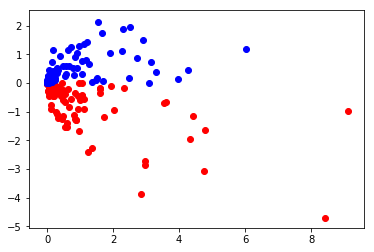

In [76]:
plt.scatter(basis(X_train)[y_train==1, 0], 
            basis(X_train)[y_train==1, 1], c='r')
plt.scatter(basis(X_train)[y_train==-1, 0], 
            basis(X_train)[y_train==-1, 1], c='b')
plt.show()

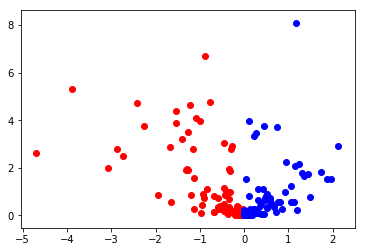

In [77]:
plt.scatter(basis(X_train)[y_train==1, 1], 
            basis(X_train)[y_train==1, 2], c='r')
plt.scatter(basis(X_train)[y_train==-1, 1], 
            basis(X_train)[y_train==-1, 2], c='b')
plt.show()

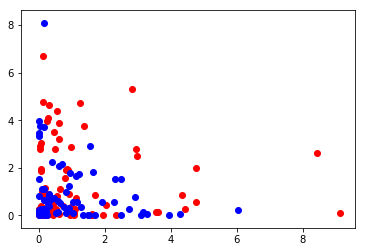

In [81]:
plt.scatter(basis(X_train)[y_train==1, 0], 
            basis(X_train)[y_train==1, 2], c='r')
plt.scatter(basis(X_train)[y_train==-1, 0], 
            basis(X_train)[y_train==-1, 2], c='b')
plt.show()